<a href="https://colab.research.google.com/github/nahin333/Monty-Hall-Problem/blob/main/Monty_Hall_Problem_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import random
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
def get_non_prize_door(host, num_doors, player_choice):
  i = 1
  while (i == host or i== player_choice ):
    i = (i+1)%(num_doors)
  
  return i

In [3]:
def switch_function(shown_door, num_doors, player_choice):
  i = 1
  while (i == shown_door or i== player_choice ):
    i = (i+1)%(num_doors)
  
  return i

In [4]:
#Play the game 
def monty_hall_game(switch, num_tests):
  win_switch_cnt = 0
  win_no_switch_cnt = 0
  lose_switch_cnt = 0
  lose_no_switch_cnt = 0
  doors = [0,1,2] #Get the doors
  num_doors = len(doors) #Get the number of doors
  
  
  for i in range(0,num_tests):
    door_with_prize = random.randint(0, num_doors-1) #Randomly choose the door with the wanted prize
    host = door_with_prize #The host knows which door has the prize
    #The player chooses initially a random door that s/he believes has the prize
    player_choice = random.randint(0, num_doors-1) 
    original_player_choice = player_choice
    shown_door = get_non_prize_door(host, num_doors, player_choice)
    if switch == True:
      player_choice = switch_function(shown_door,num_doors, player_choice)
    
    if player_choice == host and switch == False:
      #Then the player wins from not switching
      print('Player Wins (No switch) - The player chose door: ', player_choice,' Original choice: ',original_player_choice ,', Door with prize:', door_with_prize, ', Shown Door: ',shown_door )
      win_no_switch_cnt = win_no_switch_cnt + 1
    elif player_choice == host and switch == True:
      #Then the player wins from switching
      print('Player Wins (switch) - The player chose door: ', player_choice,' Original choice: ',original_player_choice , ', Door with prize:', door_with_prize, ', Shown Door: ',shown_door )
      win_switch_cnt = win_switch_cnt +1
    elif player_choice != host and switch == False:
      #The player lost from not switching
      print('Player Lost (No switch) - The player chose door: ', player_choice,' Original choice: ',original_player_choice , ', Door with prize:', door_with_prize, ', Shown Door: ',shown_door )
      lose_no_switch_cnt = lose_no_switch_cnt + 1
    elif player_choice != host and switch == True:
      #The player lost from switching
      print('Player Lost (switch) - The player chose door: ', player_choice,' Original choice: ',original_player_choice , ', Door with prize:', door_with_prize, ', Shown Door: ',shown_door )
      lose_switch_cnt = lose_switch_cnt + 1
    else:
      print('SOMETHING IS WRONG')

  return win_no_switch_cnt,win_switch_cnt,lose_no_switch_cnt,lose_switch_cnt, num_tests


In [5]:
x = monty_hall_game(True, 10)

Player Lost (switch) - The player chose door:  0  Original choice:  2 , Door with prize: 2 , Shown Door:  1
Player Wins (switch) - The player chose door:  1  Original choice:  2 , Door with prize: 1 , Shown Door:  0
Player Wins (switch) - The player chose door:  2  Original choice:  0 , Door with prize: 2 , Shown Door:  1
Player Lost (switch) - The player chose door:  0  Original choice:  1 , Door with prize: 1 , Shown Door:  2
Player Wins (switch) - The player chose door:  2  Original choice:  1 , Door with prize: 2 , Shown Door:  0
Player Wins (switch) - The player chose door:  2  Original choice:  1 , Door with prize: 2 , Shown Door:  0
Player Lost (switch) - The player chose door:  2  Original choice:  0 , Door with prize: 0 , Shown Door:  1
Player Wins (switch) - The player chose door:  2  Original choice:  1 , Door with prize: 2 , Shown Door:  0
Player Wins (switch) - The player chose door:  1  Original choice:  2 , Door with prize: 1 , Shown Door:  0
Player Lost (switch) - The p

In [6]:
print('Win switch %: ', x[1]/ x[4])
print('Lose switch %: ', x[3]/ x[4])
print('Win No switch %: ', x[0]/ x[4])
print('Lose No switch %: ', x[2]/ x[4])

Win switch %:  0.6
Lose switch %:  0.4
Win No switch %:  0.0
Lose No switch %:  0.0


In [7]:
num_tests = []
win_percentage = []
switch = True
for i in range(1,501):
  num_tests.append(i) 
  y = monty_hall_game(switch, i) 
  win_percentage.append(y[1]/ y[4])

Streaming output truncated to the last 5000 lines.
Player Wins (switch) - The player chose door:  0  Original choice:  2 , Door with prize: 0 , Shown Door:  1
Player Wins (switch) - The player chose door:  1  Original choice:  0 , Door with prize: 1 , Shown Door:  2
Player Lost (switch) - The player chose door:  0  Original choice:  2 , Door with prize: 2 , Shown Door:  1
Player Wins (switch) - The player chose door:  0  Original choice:  1 , Door with prize: 0 , Shown Door:  2
Player Wins (switch) - The player chose door:  2  Original choice:  0 , Door with prize: 2 , Shown Door:  1
Player Wins (switch) - The player chose door:  2  Original choice:  0 , Door with prize: 2 , Shown Door:  1
Player Lost (switch) - The player chose door:  0  Original choice:  1 , Door with prize: 1 , Shown Door:  2
Player Wins (switch) - The player chose door:  0  Original choice:  1 , Door with prize: 0 , Shown Door:  2
Player Wins (switch) - The player chose door:  1  Original choice:  0 , Door with pri

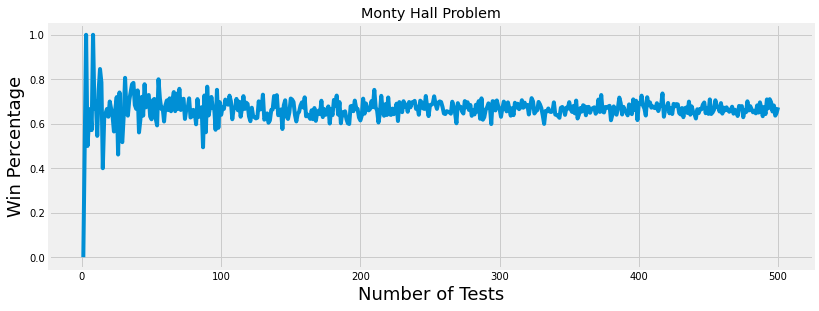

In [8]:
plt.figure(figsize=(12.2,4.5)) #width = 12.2in, height = 4.5
plt.plot( num_tests, win_percentage  )
plt.title('Monty Hall Problem')
plt.xlabel('Number of Tests',fontsize=18)
plt.ylabel('Win Percentage',fontsize=18)
plt.show()

In [9]:
print('The win percentage for test playing ', y[4], ' games is:' ,y[1]/ y[4])

The win percentage for test playing  500  games is: 0.674
